In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [0]:
from matplotlib.colors import ListedColormap

def draw_clf(model, X, y, meshgrid_steps=100, meshgrid_padding=0.05, fig_size=(6, 6), c_lightering=0.3, 
             feature_names=None, target_names=None, title=None, raw_data=False):

    x0_min, x0_max = np.min(X[:, 0]), np.max(X[:, 0])
    x1_min, x1_max = np.min(X[:, 1]), np.max(X[:, 1])

    x0_delta = (x0_max - x0_min) * meshgrid_padding
    x1_delta = (x1_max - x1_min) * meshgrid_padding

    x0_values = np.linspace(x0_min - x0_delta, x0_max + x0_delta, meshgrid_steps);
    x1_values = np.linspace(x1_min - x1_delta, x1_max + x1_delta, meshgrid_steps);

    xx0, xx1 = np.meshgrid(x0_values, x1_values)
    z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    z = z.reshape(xx0.shape)

    current_palette = np.array(sns.color_palette()[:len(np.unique(y))])
    lighter_pallete = ListedColormap(current_palette + (1 - current_palette) * c_lightering)

    if raw_data:
        return xx0, xx1, z, lighter_pallete

    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    
    ax.pcolormesh(xx0, xx1, z, cmap=lighter_pallete)

    labels = [f'class {x} - {target_names[x]}' if isinstance(target_names, (np.ndarray, list)) else f'class {x}' 
              for x in range(len(np.unique(y)))]

    for idx, lbl in enumerate(labels):
        ax.scatter(X[np.where(y==idx), 0], X[np.where(y==idx), 1], label=lbl, ec='w')
        ax.legend()

    ax.set_xlabel(feature_names[0] if feature_names else 'x0')
    ax.set_ylabel(feature_names[1] if feature_names else 'x1')
    
    if title:
        ax.set_title(title)

    return fig, ax

## Random Forest

Rnd forest score: 0.9365079365079365


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f19db855860>)

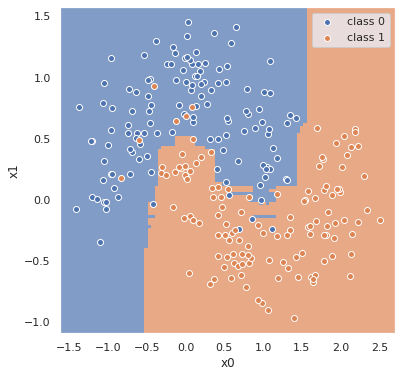

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X, y = make_moons(n_samples=250, noise=0.25, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X, y)

rnd_forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_forest.fit(X_train, y_train)

y_pred = rnd_forest.predict(X_test)
rnd_forest_score = accuracy_score(y_test, y_pred)
print('Rnd forest score:', rnd_forest_score)

draw_clf(rnd_forest, X, y)

## Random Forest vs Extra Trees

Model feature | Random Forest | Extra Trees
--- | --- | ---
Booststramp samples | True | False
Random selection of K variables | True | True
Random selection of the threshold | False | True


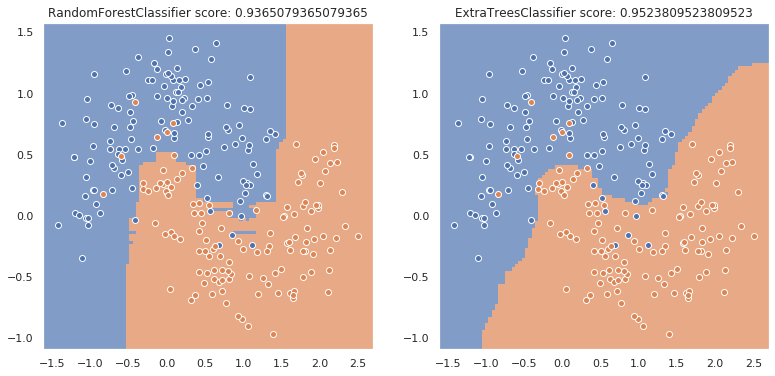

In [4]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
extra_trees.fit(X, y)

y_pred = extra_trees.predict(X_test)
extra_trees_score = accuracy_score(y_test, y_pred)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

for model, score, ax in zip([rnd_forest, extra_trees], [rnd_forest_score, extra_trees_score], axes):

    xx0, xx1, z, pallete = draw_clf(model, X, y, raw_data=True)

    ax.pcolormesh(xx0, xx1, z, cmap=pallete)
    ax.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], ec='w')
    ax.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], ec='w')
    ax.set_title(f'{model.__class__.__name__} score: {score}')
    

In [5]:
from sklearn.datasets import load_digits

digits_db = load_digits()
X = digits_db.data
y = digits_db.target

rnd_forest = RandomForestClassifier(n_jobs=-1)
rnd_forest.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

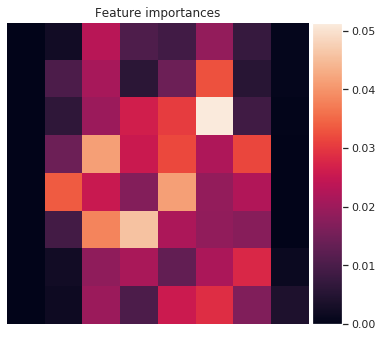

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


feat_importances = rnd_forest.feature_importances_.reshape(8, 8)

x0 = np.arange(0, 8)
x1 = np.arange(0, 8)

xx0, xx1 = np.meshgrid(x0, x1)

fig, ax = plt.subplots(figsize=(6, 6))
img = ax.imshow(feat_importances)
ax.grid(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)
fig.colorbar(img, cax=cax)
ax.set_title('Feature importances')
ax.set_axis_off()